In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from utils.utils import entropia

In [2]:
print(pd.__version__)

1.4.1


In [3]:
carpeta="data/Only_training_hipotesis_salida/"

## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [4]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [5]:
print(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

data/Only_training_hipotesis_salida/entropia/resultados_entropiaZSCORE_Transponse.pickle


In [6]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [7]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,424,375,entailment_entailment,"[7.044, 5.322, 3.065, 6.459, 5.278, 6.085, 7.2...",0
1,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,424,41,entailment_neutral,"[5.335, 5.894, 5.533, 6.418, 7.094, 6.607, 6.0...",0
2,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,424,8,entailment_contradiction,"[7.353, 5.585, 7.418, 5.392, 6.465, 5.438, 5.3...",0
3,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,460,48,neutral_entailment,"[6.524, 5.92, 6.22, 5.74, 4.766, 6.656, 6.927,...",0
4,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,460,374,neutral_neutral,"[7.411, 6.787, 5.5, 6.629, 5.615, 5.926, 7.286...",0
...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1131,387,neutral_neutral,"[5.468, 6.797, 5.773, 6.766, 7.233, 5.929, 6.1...",1
2174,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1131,656,neutral_contradiction,"[6.533, 6.862, 7.222, 6.934, 6.118, 5.543, 6.9...",1
2175,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1106,63,contradiction_entailment,"[6.824, 6.249, 5.807, 6.808, 5.492, 7.069, 6.7...",1
2176,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1106,229,contradiction_neutral,"[5.576, 6.129, 5.755, 3.17, 7.285, 7.339, 4.90...",1


In [8]:
dfn=dfn.assign(relacion=dfn["Subtotal"]/dfn["Total"])
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase,relacion
0,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,424,375,entailment_entailment,"[7.044, 5.322, 3.065, 6.459, 5.278, 6.085, 7.2...",0,0.884434
1,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,424,41,entailment_neutral,"[5.335, 5.894, 5.533, 6.418, 7.094, 6.607, 6.0...",0,0.096698
2,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,424,8,entailment_contradiction,"[7.353, 5.585, 7.418, 5.392, 6.465, 5.438, 5.3...",0,0.018868
3,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,460,48,neutral_entailment,"[6.524, 5.92, 6.22, 5.74, 4.766, 6.656, 6.927,...",0,0.104348
4,data/Only_training_hipotesis_salida/pTEST_new_...,20.0,9.csv.pickle,460,374,neutral_neutral,"[7.411, 6.787, 5.5, 6.629, 5.615, 5.926, 7.286...",0,0.813043
...,...,...,...,...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1131,387,neutral_neutral,"[5.468, 6.797, 5.773, 6.766, 7.233, 5.929, 6.1...",1,0.342175
2174,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1131,656,neutral_contradiction,"[6.533, 6.862, 7.222, 6.934, 6.118, 5.543, 6.9...",1,0.580018
2175,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1106,63,contradiction_entailment,"[6.824, 6.249, 5.807, 6.808, 5.492, 7.069, 6.7...",1,0.056962
2176,data/Only_training_hipotesis_salida/pTEST_new_...,50.0,12.csv.pickle,1106,229,contradiction_neutral,"[5.576, 6.129, 5.755, 3.17, 7.285, 7.339, 4.90...",1,0.207052


In [9]:
etiquetas=['entailment','neutral','contradiction']

In [10]:
dfn_sinparafraseo=dfn[dfn["Paraphrase"]==0]
dfn_conparafraseo=dfn[dfn["Paraphrase"]==1]

# Vamos a dibujar la relación de aciertos (grupal) y errores

<AxesSubplot:xlabel='grupo', ylabel='relacion'>

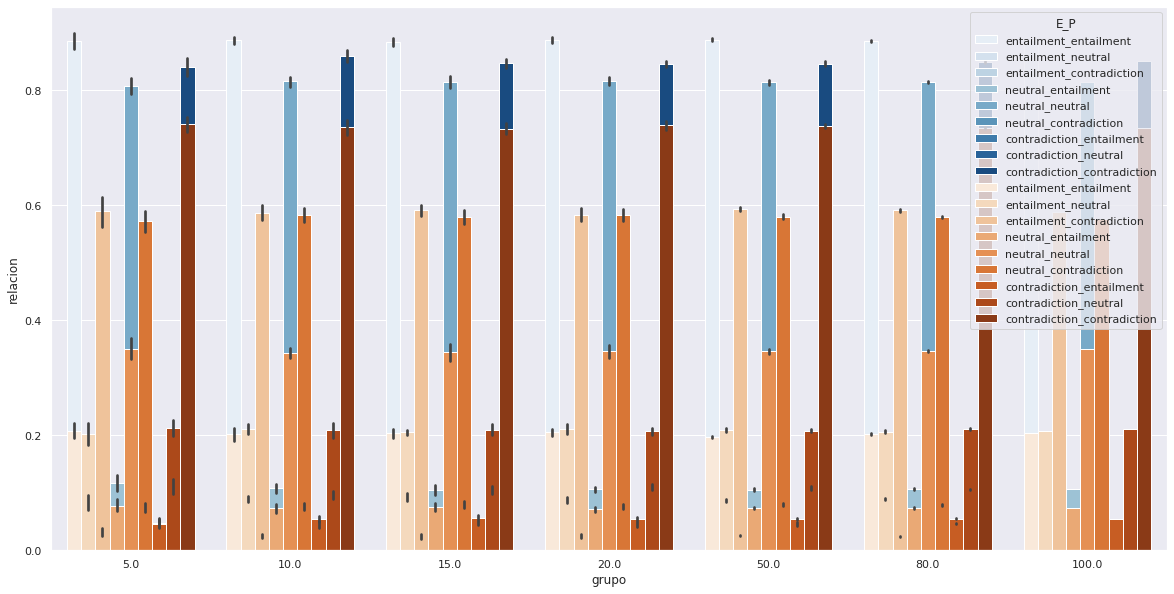

In [11]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=dfn_sinparafraseo,x="grupo",y="relacion", hue="E_P",palette="Blues")
sns.barplot(data=dfn_conparafraseo,x="grupo",y="relacion", hue="E_P",palette="Oranges")

<AxesSubplot:xlabel='grupo', ylabel='relacion'>

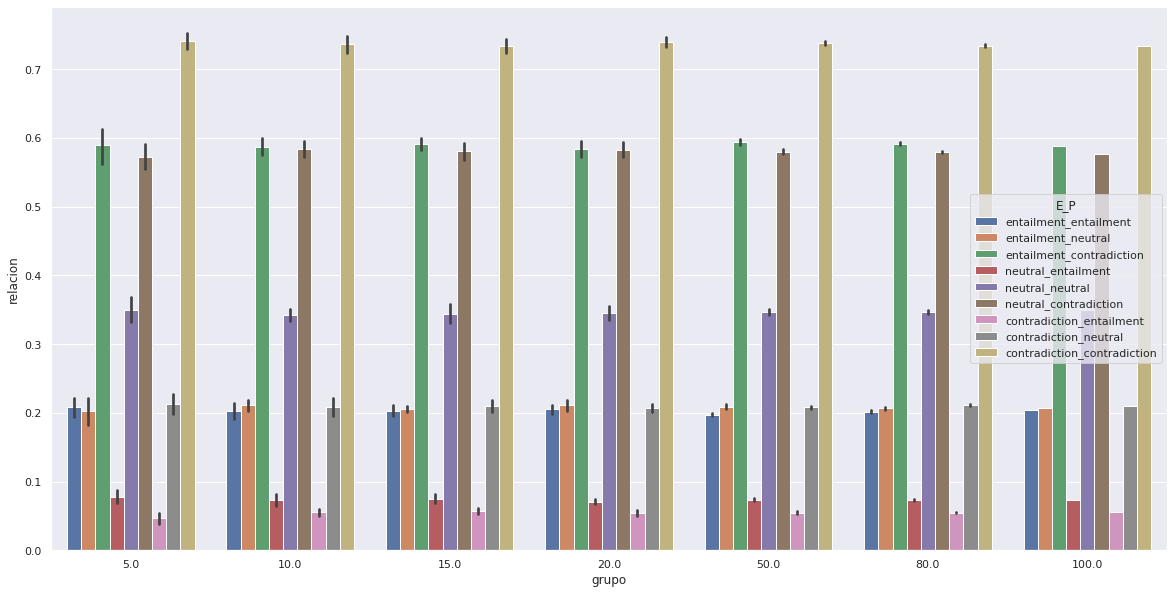

In [12]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data=dfn_conparafraseo,x="grupo",y="relacion", hue="E_P")

## Los anteriores resultados muestran que en cada muestreo hay una gran diferencia de los aciertos vs los errores un promedio de 80 % para los casos de entailment_entailment, neutral_neutral y contradiction_contradiction.

## Por otro lado, existe un porcentaje alto (relativamente) de los X_neutral, es decir que a partir del texto no se logré decidir si es entailment o contradiction. 18% promedio de errores cuando en realidad es entailment y predice neutralidad y 12% promedio cuando debería ser contradiction. lo mismo ocurre cuando es neutralidad y predice entailment o contradiction con 10% cada uno. Y en los ultimos casos donde se parte de un entailment y predice una contradiction con un 5% y que con un target contradiction lleva a una prediccion de entailment con 5%.

##


In [13]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

# Matriz de alineamiento
# Procesar todos los archivos p*.pickle para agregar columnas que obtengan los POS que tienen más que un umbral

In [14]:
muestreos=['0.05','0.1','0.15','0.2','0.5','0.8','1']

In [15]:
#POS donde encuentra coincidencia
#pos=['DET','AUX','NOUN','PROPN','CONJ','VERB','ADP','ADV','NUM','ADJ','PART','PRON','X','CCONJ','PUNCT','INTJ','SYM']

In [16]:
pos=['NOUN','VERB','ADP','ADV','ADJ']

In [17]:
# De acuerdo al análisis estadístico se obtiene que el umbral es de 0.5
umbral=0.5

In [18]:
new_data = {'Docs' : [], 'grupo': [], 'datos': [],'minimo':[],'maximo':[],'3quartile':[]}
for g in muestreos:
    a=glob.glob(carpeta+'p*_'+g+'_*.pickle')
    for e in a:
        min_max=[]
        temp=pd.read_pickle(e)
        df=temp.copy()
        temp=temp.assign(ma_umbral="")
        for indice,strings in df.iterrows():
            t=strings['Text']
            h=strings['Hipotesis']
            matriz=strings['M_Align']
            matriz_c=matriz[1:len(t)-1,1:len(h)-1]
            min_max.extend(matriz_c.flatten())
            # Se coloca el máximo de tokens de acuerdo a la configuración del parafraseo
            if(len(t[1:-1])>41):
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:42])
            elif(len(h[1:-1])>41):
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:42],index=t[1:-1])
            else:
                p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:-1])
            c_a=p1_df1.columns
            data=pd.DataFrame("",columns=pos,index=pos)
            for i,strings2 in p1_df1.iterrows():
                for j in range(len(c_a)):
                    if(strings2[j]>umbral):
                        if(i.split(',')[1][:-1]!='' and c_a[j].split(',')[1][:-1]!='' and i.split(',')[1][:-1] in pos and c_a[j].split(',')[1][:-1] in pos):
                            data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]]=str(data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]])+","+str(strings2[j])
            temp.at[indice,'ma_umbral']=data
            temp.at[indice,'target_prediction']=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])+"_"+mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
        temp.to_pickle(e)
        new_data['Docs'].append(e)
        new_data['grupo'].append(g)
        new_data['datos'].append(min_max[:])
        new_data['3quartile'].append(np.quantile(np.asarray(min_max),q=0.75))
        new_data['minimo'].append(np.min(np.asarray(min_max)))
        new_data['maximo'].append(np.max(np.asarray(min_max)))
        min_max.clear()
df_resume=pd.DataFrame(new_data)
df_resume.to_pickle(carpeta+"align/data_POS_ALIGN.pickle")

# Identificación de umbral de alineamiento para obtener el 60% de los valores mayores al umbral

In [19]:
df=pd.read_pickle(carpeta+"align/data_POS_ALIGN.pickle")

In [20]:
df

,Docs,grupo,datos,minimo,maximo,3quartile
0,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.02611161, 0.045506727, 0.014831392, 0.01882...",0.0,8.681258,0.451788
1,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.027860489, 0.14996003, 0.051680673, 0.01034...",0.0,8.220510,0.455591
2,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.02611161, 0.045506727, 0.014831392, 0.00164...",0.0,9.173684,0.479832
3,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[0.0026690778, 0.054610066, 0.04967856, 0.0360...",0.0,8.699710,0.458152
4,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"[2.7044032, 1.2207389, 0.014878633, 0.97265226...",0.0,8.681258,0.474162
...,...,...,...,...,...,...
116,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.02611161, 0.07289694, 0.014831392, 0.067600...",0.0,9.173684,0.456988
117,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.0026690778, 0.045506727, 0.014831392, 0.0, ...",0.0,9.173684,0.454506
118,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.02611161, 0.1289273, 0.020569341, 0.0261116...",0.0,9.173684,0.456686
119,data/Only_training_hipotesis_salida/pTEST_new_...,0.8,"[0.58782685, 0.45364106, 0.12269817, 0.2855057...",0.0,9.173684,0.458462


In [21]:
umbral=df['3quartile'].mean()
umbral

0.4580573312753488

In [22]:
data = df['datos'][0]
data.sort()
len(data)

74596

In [23]:
#Vamos a eliminar los ceros
nueva_data=[]
for e in data:
    if e!=0.0:
        nueva_data.append(e)
print(len(nueva_data))

72955


In [24]:
#Como ya esta ordenado nos vamos a quedar con el 40% de los datos y el ultimo será el umbral
nd=nueva_data[:round(len(nueva_data)*0.5)]
nd[-1]

0.07660741

In [25]:
np.median(nueva_data)

0.07660741

In [26]:
print(np.quantile(nueva_data,q=0.25))
print(np.quantile(nueva_data,q=0.5))
print(np.quantile(nueva_data,q=0.75))
print(np.quantile(nueva_data,q=1))

0.018720436841249466
0.07660741358995438
0.4633418619632721
8.681258


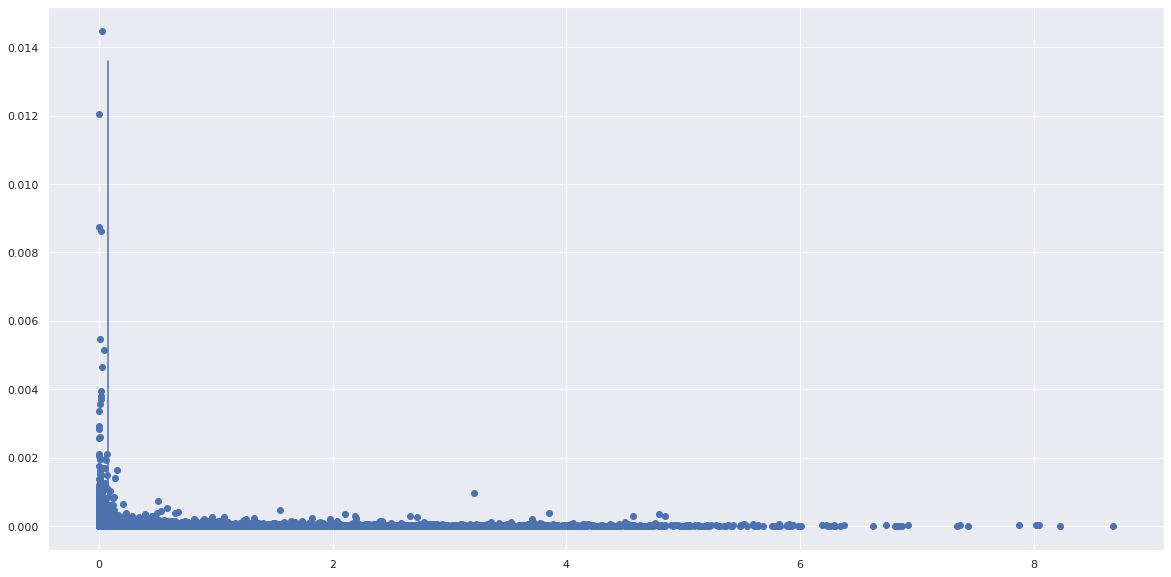

In [27]:
# Vamos a dibujar el umbral y la distribución de los datos
min_d=min(nueva_data)
max_d=max(nueva_data)
tamanio=len(nueva_data)
unicos = list(set(nueva_data))
y = [ nueva_data.count(x)/tamanio for x in unicos]
fig, ax = plt.subplots()
ax.scatter(x = unicos, y = y)
plt.axvline(x=nd[-1], ymin=0.1, ymax=0.9)
plt.show() #dibujamos el histograma

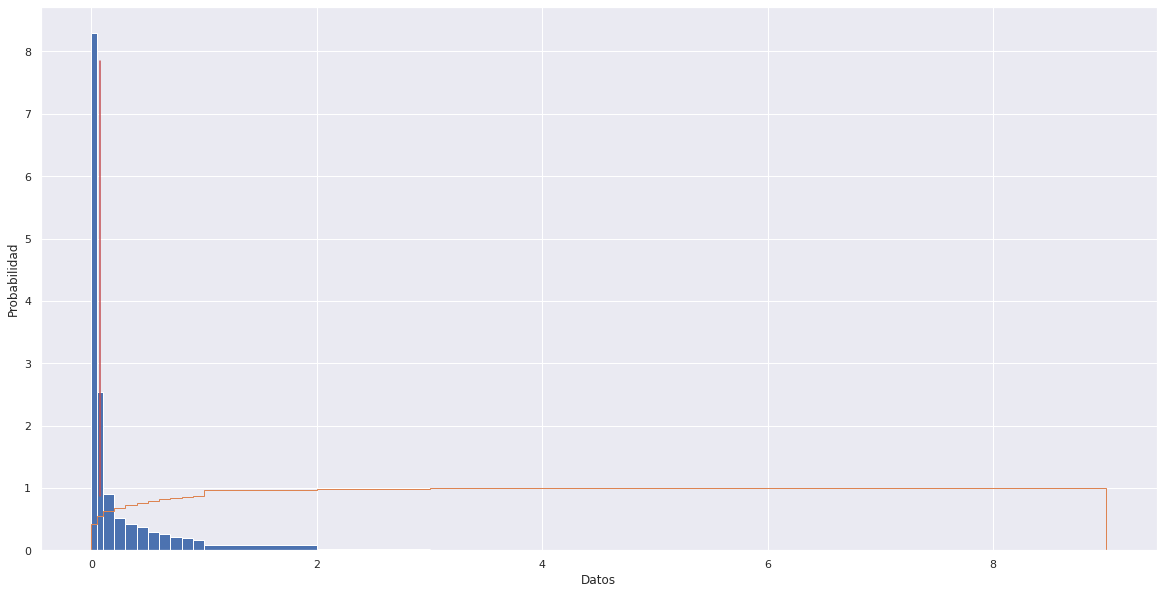

In [28]:
plt.hist(nueva_data, bins=[0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4,5,6,7,8,9], density=True)
plt.hist(nueva_data, bins=[0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4,5,6,7,8,9], density=True, cumulative=True, label='CDF', histtype='step')
plt.axvline(x=nd[-1], ymin=0.1, ymax=0.9, color = "r")   
plt.xlabel("Datos")
plt.ylabel("Probabilidad")
plt.show() 

# De acuerdo al umbral obtener pares de palabras del texto y la hipótesis mayores a este (1)

In [29]:
muestreos

['0.05', '0.1', '0.15', '0.2', '0.5', '0.8', '1']

In [30]:
a=glob.glob(carpeta+'p*_'+muestreos[1]+'_*.pickle')
a

['data/Only_training_hipotesis_salida/pTEST_new_0.1_5.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_19.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_0.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_10.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_3.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_11.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_6.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_7.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_8.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_9.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_4.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_15.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_2.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_13.csv.pickle',
 'data/Only_training_hipotesis_salida/pTEST_new_0.1_16.cs

In [31]:
dfm=pd.read_pickle(a[0])
dfm

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.00511...","[0.886542, 0.043323632, 0.07013439]","[1.0, 0.0, 0.0]",0,9814,entailment,entailment,...,entailment_entailment
1,1,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.170...","[0.11751552, 0.72009444, 0.16238992]","[0.0, 0.0, 1.0]",0,737,neutral,contradiction,...,contradiction_neutral
2,2,"[NULL{null,ADJ}, women{woman,NOUN}, playing{pl...","[NULL{null,ADJ}, women{woman,NOUN}, cooking{co...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.21101676, 0.24132283, 0.22304...","[3.259191e-06, 6.5585923e-06, 0.9999902]","[0.0, 0.0, 1.0]",0,5104,contradiction,contradiction,NOUN ...,contradiction_contradiction
3,3,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,ADJ}, people{people,NOUN}, in{in,AD...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.16620766, 0.03528291, 0.18736...","[0.97139907, 0.026362663, 0.0022383465]","[1.0, 0.0, 0.0]",0,5556,entailment,entailment,...,entailment_entailment
4,4,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0161...","[0.90874726, 0.08507761, 0.0061751357]","[1.0, 0.0, 0.0]",0,6919,entailment,entailment,...,entailment_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,"[NULL{null,PROPN}, a{a,DET}, couple{couple,NOU...","[NULL{null,ADJ}, one{one,NUM}, of{of,ADP}, the...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.019654976, 0.081...","[0.00035616374, 0.0005991815, 0.9990446]","[0.0, 0.0, 1.0]",1,9767,contradiction,contradiction,NOUN VERB ADP ADV ADJ NOUN...,contradiction_contradiction
1334,1334,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21513091, 0.01119...","[0.0001327504, 0.00022850184, 0.9996388]","[0.0, 1.0, 0.0]",1,9770,contradiction,neutral,NOUN...,neutral_contradiction
1335,1335,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.27504116, 0.101227164, 0.1314...","[0.016106088, 0.031664304, 0.9522296]","[1.0, 0.0, 0.0]",1,9777,contradiction,entailment,...,entailment_contradiction
1336,1336,"[NULL{null,ADJ}, two{two,NUM}, gondola{gondola...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21513091, 0.17841...","[0.00012794006, 0.00055327616, 0.99931884]","[0.0, 0.0, 1.0]",1,9807,contradiction,contradiction,...,contradiction_contradiction


In [32]:
dfm['ma_umbral'][1]

,NOUN,VERB,ADP,ADV,ADJ
NOUN,",3.2146893,0.55621284,0.80325484,0.55621284,1....",",1.688263,1.8991126,1.2703792,1.1023649,1.1803...",",0.8473659,1.0490975,0.87779194,1.0149741,0.75...",",1.1045825,1.5261793,0.5004426,0.6246794",",1.2382258,1.2673967"
VERB,",0.72232217,0.8769111,0.5548147,1.4375203",",1.4804057,0.61756027",",0.63307846",",0.83916885",
ADP,",0.8473659,0.87779194,1.0149741",",1.7145431",",1.6965739",",0.6558781",
ADV,,,,,
ADJ,",1.2382258,1.2673967,4.925427,1.4186815,1.0665...",",1.8639457",,",0.6078335",",3.3542507"


In [33]:
dfm

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.00511...","[0.886542, 0.043323632, 0.07013439]","[1.0, 0.0, 0.0]",0,9814,entailment,entailment,...,entailment_entailment
1,1,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.170...","[0.11751552, 0.72009444, 0.16238992]","[0.0, 0.0, 1.0]",0,737,neutral,contradiction,...,contradiction_neutral
2,2,"[NULL{null,ADJ}, women{woman,NOUN}, playing{pl...","[NULL{null,ADJ}, women{woman,NOUN}, cooking{co...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.21101676, 0.24132283, 0.22304...","[3.259191e-06, 6.5585923e-06, 0.9999902]","[0.0, 0.0, 1.0]",0,5104,contradiction,contradiction,NOUN ...,contradiction_contradiction
3,3,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,ADJ}, people{people,NOUN}, in{in,AD...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.16620766, 0.03528291, 0.18736...","[0.97139907, 0.026362663, 0.0022383465]","[1.0, 0.0, 0.0]",0,5556,entailment,entailment,...,entailment_entailment
4,4,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0161...","[0.90874726, 0.08507761, 0.0061751357]","[1.0, 0.0, 0.0]",0,6919,entailment,entailment,...,entailment_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,"[NULL{null,PROPN}, a{a,DET}, couple{couple,NOU...","[NULL{null,ADJ}, one{one,NUM}, of{of,ADP}, the...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.019654976, 0.081...","[0.00035616374, 0.0005991815, 0.9990446]","[0.0, 0.0, 1.0]",1,9767,contradiction,contradiction,NOUN VERB ADP ADV ADJ NOUN...,contradiction_contradiction
1334,1334,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21513091, 0.01119...","[0.0001327504, 0.00022850184, 0.9996388]","[0.0, 1.0, 0.0]",1,9770,contradiction,neutral,NOUN...,neutral_contradiction
1335,1335,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.27504116, 0.101227164, 0.1314...","[0.016106088, 0.031664304, 0.9522296]","[1.0, 0.0, 0.0]",1,9777,contradiction,entailment,...,entailment_contradiction
1336,1336,"[NULL{null,ADJ}, two{two,NUM}, gondola{gondola...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21513091, 0.17841...","[0.00012794006, 0.00055327616, 0.99931884]","[0.0, 0.0, 1.0]",1,9807,contradiction,contradiction,...,contradiction_contradiction


In [34]:
tp=dfm['target_prediction'].unique()

In [35]:
len(tp)

9

In [36]:
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [37]:
new_data = {'Docs' : [], 'grupo': [], 'datos': [],'etiqueta':[],'paraphrase':[]}
conteo=0
for gp in muestreos:
    a=glob.glob(carpeta+'p*_'+gp+'_*.pickle')
    for e in a:
        print(e)
        temp=pd.read_pickle(e)
        for f in labels:
            #obtener la matriz de alineamiento
            for pf in [0,1]:
                #vamos a filtrar por target prediction
                data={}
                temp2=temp[(temp['target_prediction']==f) & (temp['Paraphrase']==pf) ]
                for index2,strings2 in temp2.iterrows():
                    dt=strings2['ma_umbral']
                    columnas3=dt.columns
                    for index3,strings3 in dt.iterrows():
                        for c in columnas3:
                            num=strings3[c].split(',')
                            if(len(num)>1):
                                if(index3+"_"+c in data):
                                    g=data[index3+"_"+c]
                                    #print(g,index3+"_"+c)
                                    data[index3+"_"+c]= g+num[1:]
                                    #print(g.extend(num[1:]),data[index3+"_"+c],num[1:])
                                elif(c+"_"+index3 in data):
                                    g=data[c+"_"+index3]
                                    #print(g,index3+"_"+c)
                                    data[c+"_"+index3]= g+num[1:]
                                else:
                                    #print("entra:",index3+"_"+c,num[1:])
                                    data[index3+"_"+c]=num[1:]
                new_data['Docs'].append(e)
                new_data['grupo'].append(gp)
                new_data['datos'].append(data)
                new_data['etiqueta'].append(f)
                new_data['paraphrase'].append(pf)
data_boxplot=pd.DataFrame(new_data)
data_boxplot.to_pickle(carpeta+"align/union_vbosplot.pickle")

data/Only_training_hipotesis_salida/pTEST_new_0.05_8.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_16.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_0.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_14.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_2.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_15.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_18.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_5.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_13.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_11.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_1.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_3.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_4.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_17.csv.pickle
data/Only_training_hipotesis_salida/pTEST_new_0.05_12.csv.pickle
data/Only_training_hipotesis_sal

In [38]:
# Se obtuvieron dos dataframe finales 
# 1) data_POS_ALIGN_T_H.pickle que toma en cuenta la dirección de la alineación de un archivo de un muestreo, por target_prediction 
# es decir NOUN_ADJ es NOUN (Texto) y ADJ (hipótesis) que es diferente de ADJ_NOUN: ADJ (Texto) y NOUN (hipótesis)
# 2) data_POS_ALIGN.pickle no toma en cuenta la dirección de la alineación si no solo el tipo de palabras que se vinculan
# no importa en donde este Texto o Hipótesis

In [39]:
data_boxplot=pd.read_pickle(carpeta+"align/union_vbosplot.pickle")

In [40]:
data_boxplot

,Docs,grupo,datos,etiqueta,paraphrase
0,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['3.2146893', '0.7680656', '5.18...",entailment_entailment,0
1,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['2.3994918', '2.1025875', '5.49...",entailment_entailment,1
2,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['3.7025406', '0.91540396', '1.6...",entailment_neutral,0
3,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_ADJ': ['1.2330968', '1.2960782', '0.884...",entailment_neutral,1
4,data/Only_training_hipotesis_salida/pTEST_new_...,0.05,"{'NOUN_NOUN': ['3.2146893', '1.0912669', '1.09...",entailment_contradiction,0
...,...,...,...,...,...
2173,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['1.9776106', '0.84690475', '1.1...",contradiction_entailment,1
2174,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['1.3148733', '1.2287618', '0.82...",contradiction_neutral,0
2175,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'ADJ_NOUN': ['0.646368', '1.1002231', '1.4092...",contradiction_neutral,1
2176,data/Only_training_hipotesis_salida/pTEST_new_...,1,"{'NOUN_NOUN': ['1.3034014', '2.2022123', '0.99...",contradiction_contradiction,0


In [41]:
dict0=data_boxplot['datos'][0]
dict1=data_boxplot['datos'][1]

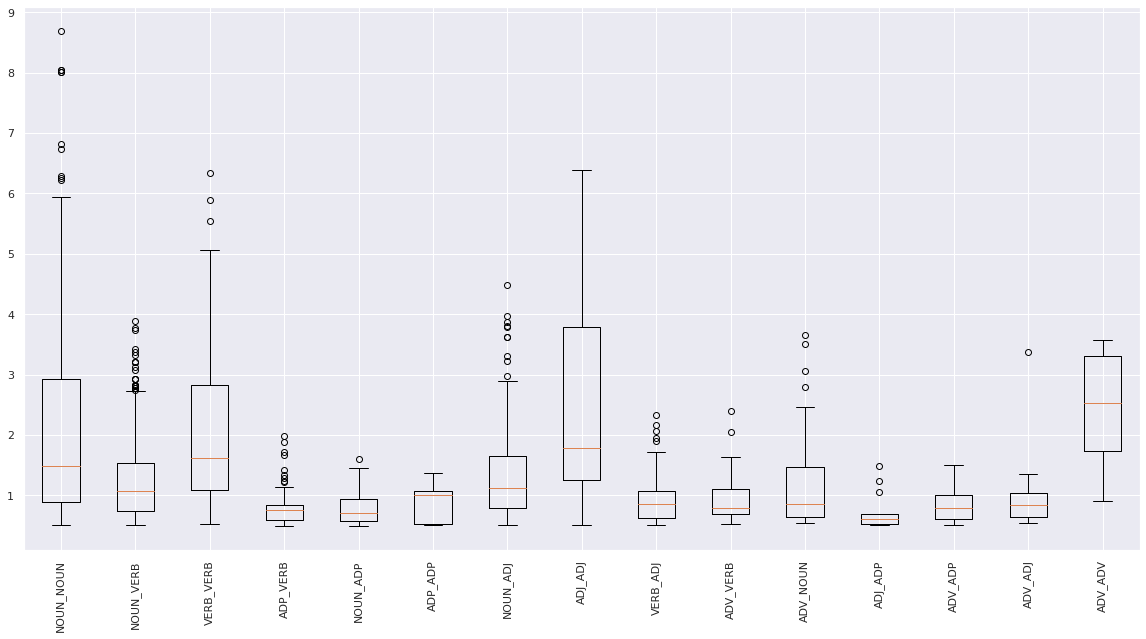

In [42]:
data_final0=[]

# or backwards compatable    
labels0, data0 = dict0.keys(), list(dict0.values())
for i in range(len(data0)):
    floats = [float(x) for x in data0[i]]
    data_final0.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final0)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels0) + 1), labels0)
plt.show()

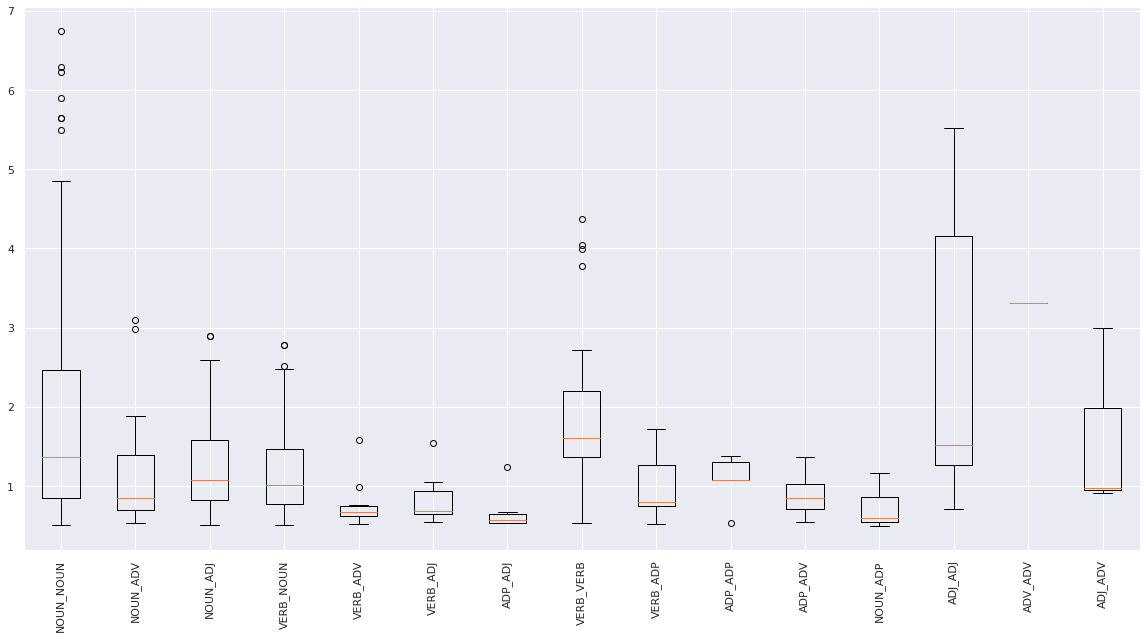

In [43]:
data_final1=[]
# or backwards compatable    
labels1, data1 = dict1.keys(), list(dict1.values())
for i in range(len(data1)):
    floats = [float(x) for x in data1[i]]
    data_final1.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final1)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels1) + 1), labels1)
plt.show()

# Procesar los dataframe de forma global por muestreo y compararlos con target_prediction de acuerdo a los tipos de palabras que se alinearon

In [44]:
df_global=pd.read_pickle(carpeta+"align/union_vbosplot.pickle")

In [45]:
from itertools import chain
from collections import defaultdict

In [46]:
new_data = {'grupo': [], 'datos': [],'etiqueta':[],'paraphrase':[]}
conteo=0
temp=df_global.copy()
for gp in muestreos:
    for f in tp:
        #obtener la matriz de alineamiento
        for pf in [0,1]:
            temp2=temp[(temp['etiqueta']==f) & (temp['paraphrase']==pf) & (temp['grupo']==gp)]
            dt_b = defaultdict(list)
            for index2,strings2 in temp2.iterrows():
                dt=strings2['datos']
                for k, v in chain(dt.items()):
                    dt_b[k].append(v)
            new_data['grupo'].append(gp)
            new_data['datos'].append(dt_b)
            new_data['etiqueta'].append(f)
            new_data['paraphrase'].append(pf)
data_boxplot_global=pd.DataFrame(new_data)
data_boxplot_global.to_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [47]:
data_boxplot_global=pd.read_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [48]:
data_boxplot_global

,grupo,datos,etiqueta,paraphrase
0,0.05,"{'NOUN_NOUN': [['3.2146893', '0.7680656', '5.1...",entailment_entailment,0
1,0.05,"{'NOUN_NOUN': [['2.3994918', '2.1025875', '5.4...",entailment_entailment,1
2,0.05,"{'NOUN_NOUN': [['2.4062524', '1.1800138', '0.6...",contradiction_neutral,0
3,0.05,"{'NOUN_NOUN': [['3.6481314', '1.157683', '1.33...",contradiction_neutral,1
4,0.05,"{'NOUN_NOUN': [['1.9542669', '1.7007858', '1.8...",contradiction_contradiction,0
...,...,...,...,...
121,1,"{'NOUN_NOUN': [['1.9776106', '0.84690475', '1....",contradiction_entailment,1
122,1,"{'NOUN_NOUN': [['1.7318101', '1.205868', '2.39...",neutral_entailment,0
123,1,"{'NOUN_NOUN': [['0.75073254', '2.241436', '2.2...",neutral_entailment,1
124,1,"{'NOUN_NOUN': [['3.2146893', '2.588851', '1.05...",entailment_neutral,0


In [49]:
dict0_g=data_boxplot_global['datos'][0]
dict1_g=data_boxplot_global['datos'][1]
dict2_g=data_boxplot_global['datos'][2]
dict3_g=data_boxplot_global['datos'][3]
dict4_g=data_boxplot_global['datos'][4]
dict5_g=data_boxplot_global['datos'][5]

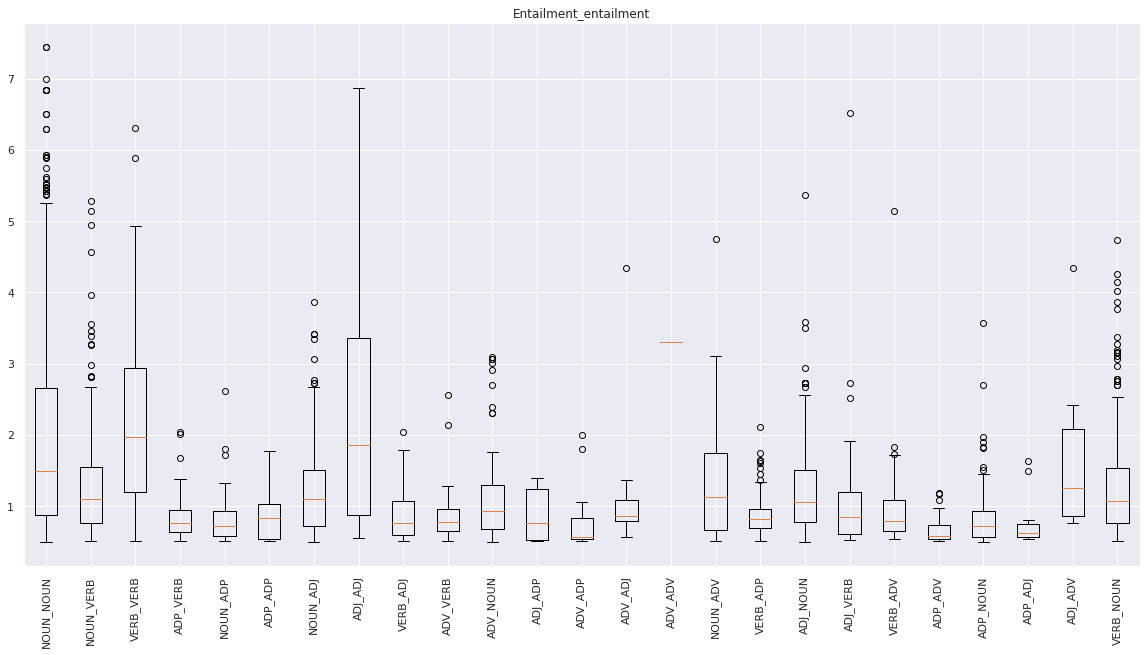

In [50]:
data_final0g=[]

# or backwards compatable    
labels0g, data0g = dict0_g.keys(), list(dict0_g.values())
for i in range(len(data0g)):
    for j in range(len(data0g[i])):
        floats = [float(x) for x in data0g[i][j]]
    data_final0g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final0g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels0g) + 1), labels0g)
plt.title("Entailment_entailment")
plt.show()

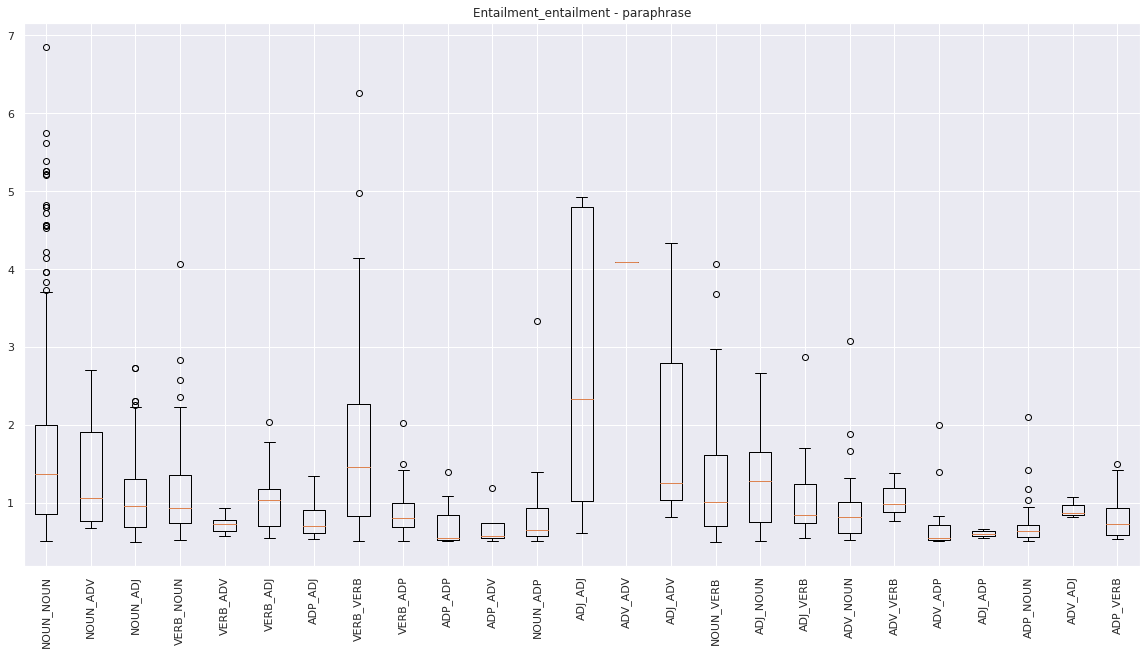

In [51]:
data_final1g=[]

# or backwards compatable    
labels1g, data1g = dict1_g.keys(), list(dict1_g.values())
for i in range(len(data1g)):
    for j in range(len(data1g[i])):
        floats = [float(x) for x in data1g[i][j]]
    data_final1g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final1g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels1g) + 1), labels1g)
plt.title("Entailment_entailment - paraphrase")
plt.show()

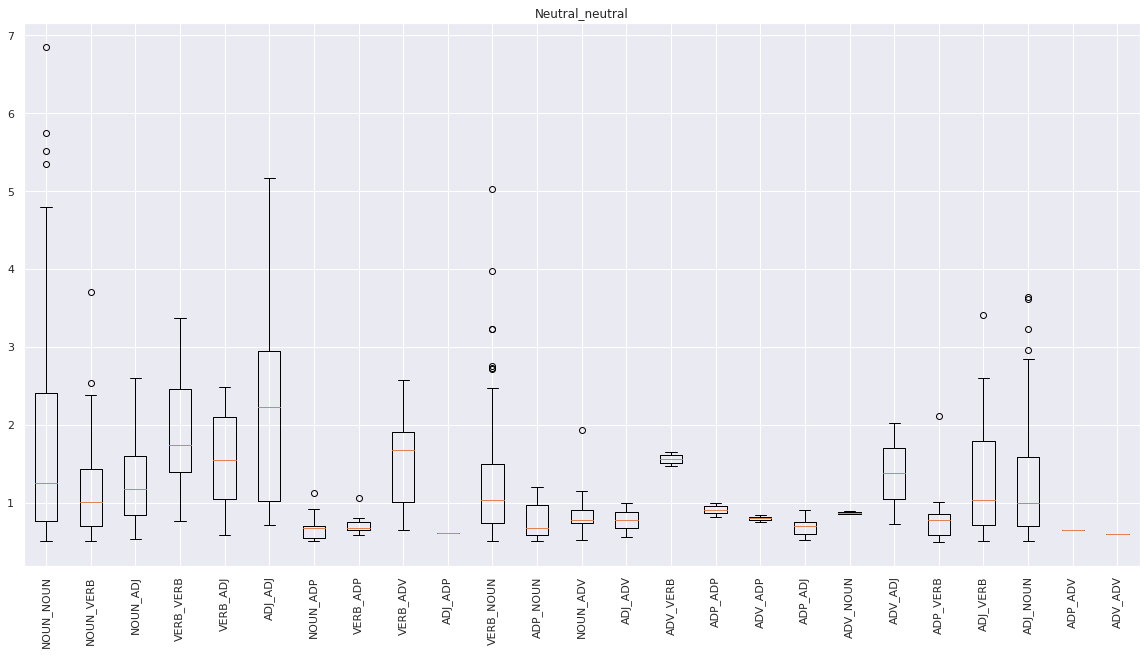

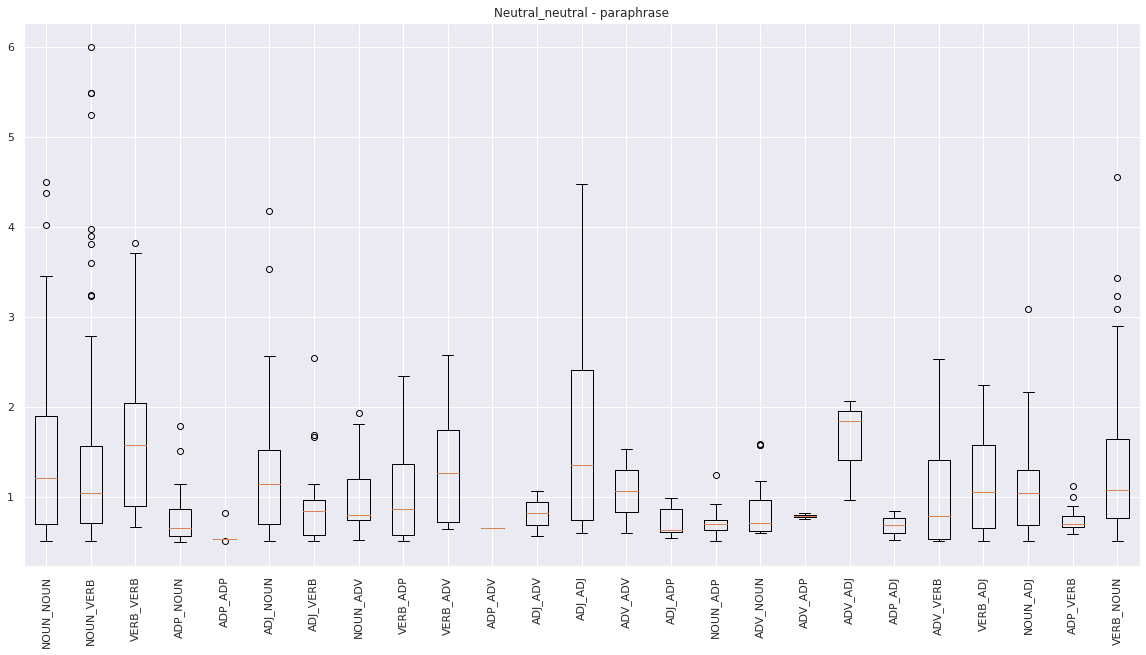

In [52]:
data_final2g=[]

# or backwards compatable    
labels2g, data2g = dict2_g.keys(), list(dict2_g.values())
for i in range(len(data2g)):
    for j in range(len(data2g[i])):
        floats = [float(x) for x in data2g[i][j]]
    data_final2g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final2g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels2g) + 1), labels2g)
plt.title("Neutral_neutral")
plt.show()

data_final3g=[]

# or backwards compatable    
labels3g, data3g = dict3_g.keys(), list(dict3_g.values())
for i in range(len(data3g)):
    for j in range(len(data3g[i])):
        floats = [float(x) for x in data3g[i][j]]
    data_final3g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final3g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels3g) + 1), labels3g)
plt.title("Neutral_neutral - paraphrase")
plt.show()

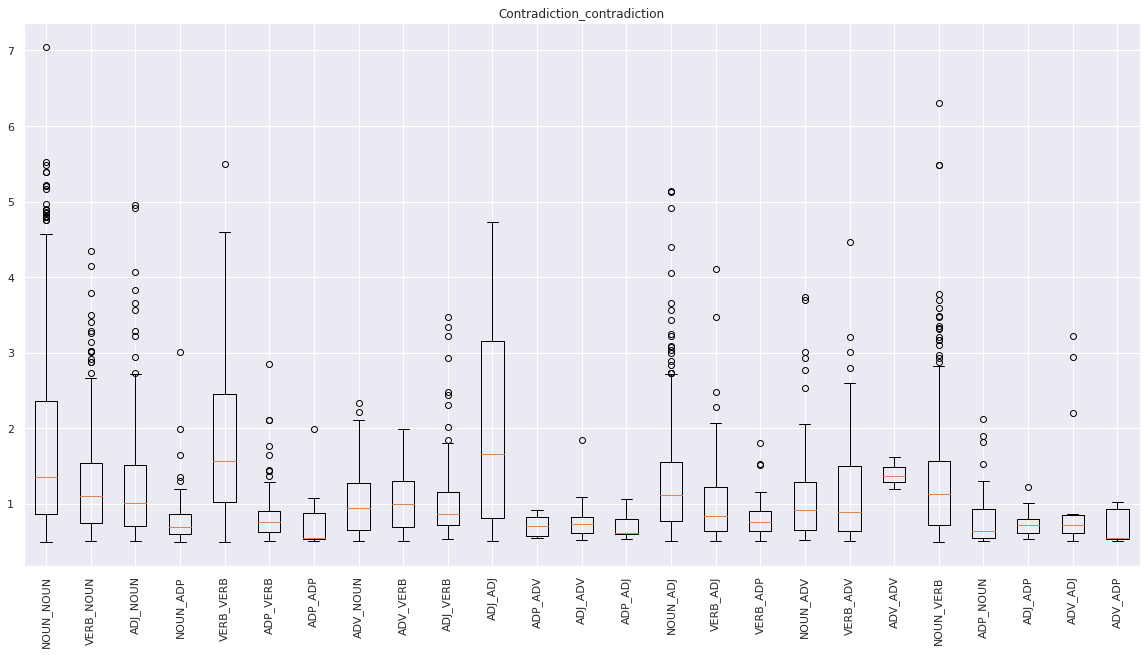

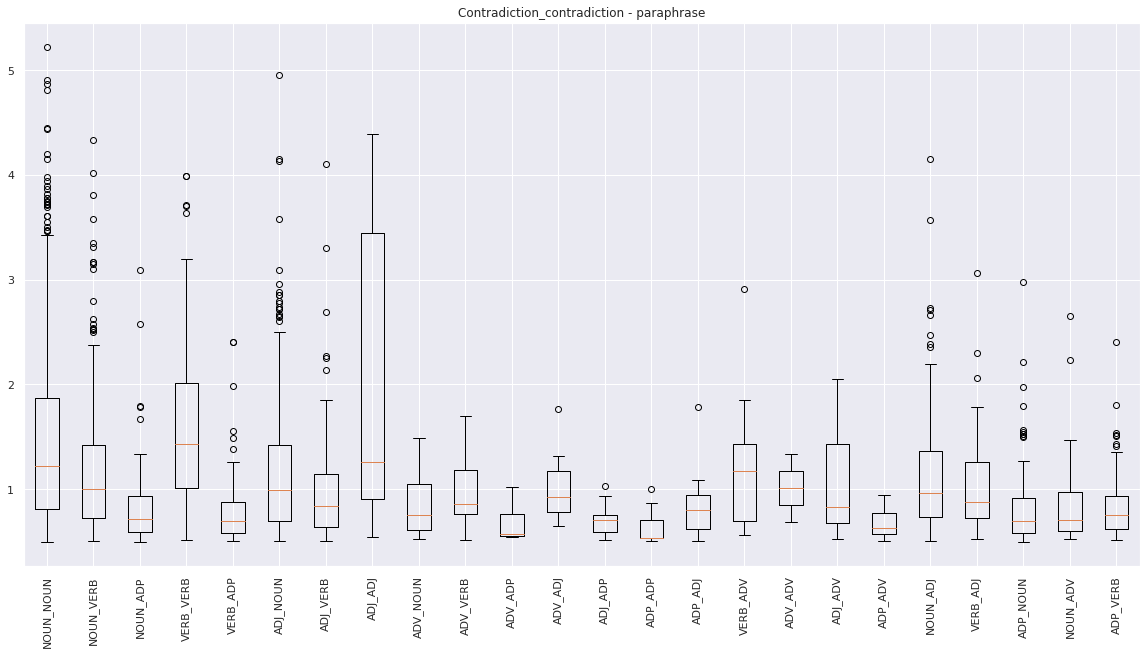

In [53]:
data_final4g=[]

# or backwards compatable    
labels4g, data4g = dict4_g.keys(), list(dict4_g.values())
for i in range(len(data4g)):
    for j in range(len(data4g[i])):
        floats = [float(x) for x in data4g[i][j]]
    data_final4g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final4g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels4g) + 1), labels4g)
plt.title("Contradiction_contradiction")
plt.show()

data_final5g=[]

# or backwards compatable    
labels5g, data5g = dict5_g.keys(), list(dict5_g.values())
for i in range(len(data5g)):
    for j in range(len(data5g[i])):
        floats = [float(x) for x in data5g[i][j]]
    data_final5g.append(floats)
plt.figure(figsize=(20,10))
plt.boxplot(data_final5g)
plt.xticks(rotation = 90)
plt.xticks(range(1, len(labels5g) + 1), labels5g)
plt.title("Contradiction_contradiction - paraphrase")
plt.show()

# vamos a crear los mapas de calor con conteos de los valores por tipo de palabras que tienen un alineamiento mayor al umbral

In [54]:
data_boxplot_global

,grupo,datos,etiqueta,paraphrase
0,0.05,"{'NOUN_NOUN': [['3.2146893', '0.7680656', '5.1...",entailment_entailment,0
1,0.05,"{'NOUN_NOUN': [['2.3994918', '2.1025875', '5.4...",entailment_entailment,1
2,0.05,"{'NOUN_NOUN': [['2.4062524', '1.1800138', '0.6...",contradiction_neutral,0
3,0.05,"{'NOUN_NOUN': [['3.6481314', '1.157683', '1.33...",contradiction_neutral,1
4,0.05,"{'NOUN_NOUN': [['1.9542669', '1.7007858', '1.8...",contradiction_contradiction,0
...,...,...,...,...
121,1,"{'NOUN_NOUN': [['1.9776106', '0.84690475', '1....",contradiction_entailment,1
122,1,"{'NOUN_NOUN': [['1.7318101', '1.205868', '2.39...",neutral_entailment,0
123,1,"{'NOUN_NOUN': [['0.75073254', '2.241436', '2.2...",neutral_entailment,1
124,1,"{'NOUN_NOUN': [['3.2146893', '2.588851', '1.05...",entailment_neutral,0


# Generar los mapas de calor por muestreo

In [55]:
lista_mapas=[]
lista_nombres=[]

In [56]:
for index, strings in data_boxplot_global.iterrows():
    p_df=pd.DataFrame(0,columns=pos,index=pos)
    for k,v in strings['datos'].items():
        indice=k.split('_')[0]
        columna=k.split('_')[1]
        p_df.at[indice,columna]=len(v)
    lista_mapas.append(p_df.copy())
    lista_nombres.append(strings['grupo']+' - '+strings['etiqueta']+'s - '+str(strings['paraphrase']))
    #sns.heatmap(p_df, center=0, cmap='Blues_r', annot=True, fmt='.0f',ax=axes[j,i]).set(title=strings['grupo']+' - '+strings['etiqueta']+' - '+str(strings['paraphrase']))
#plt.show()

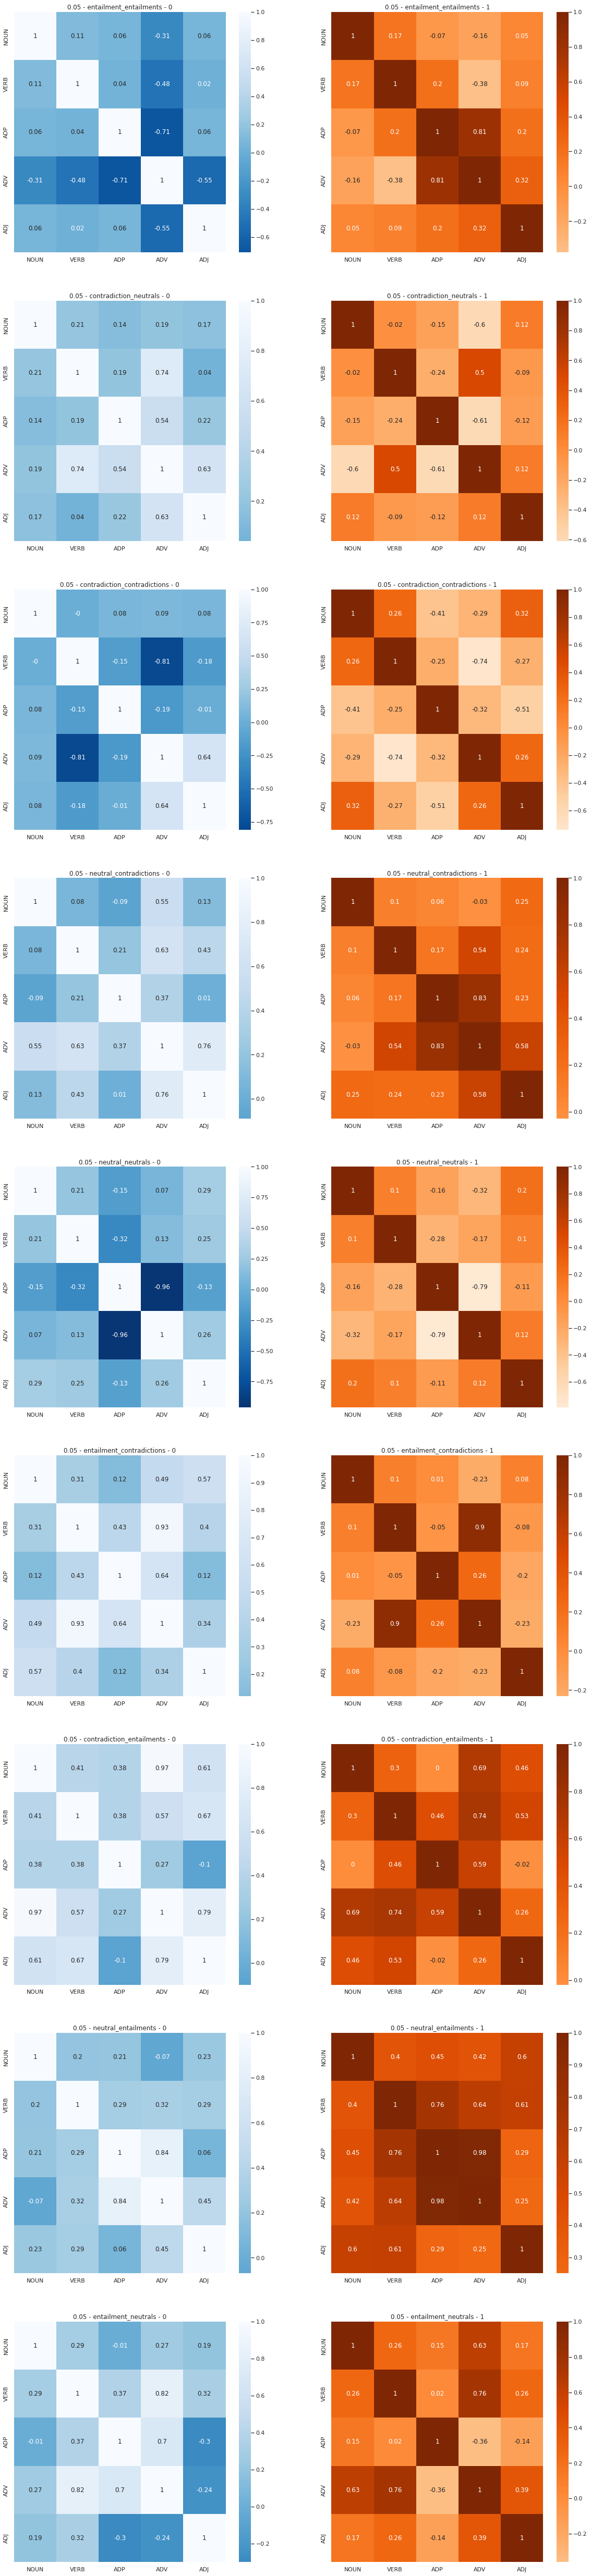

In [57]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(0,len(lista_mapas[:18]),2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i].corr().round(2), center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1].corr().round(2), center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

In [58]:
print(lista_mapas[2].corr().round(2))
print(lista_nombres[2])

      NOUN  VERB   ADP   ADV   ADJ
NOUN  1.00  0.21  0.14  0.19  0.17
VERB  0.21  1.00  0.19  0.74  0.04
ADP   0.14  0.19  1.00  0.54  0.22
ADV   0.19  0.74  0.54  1.00  0.63
ADJ   0.17  0.04  0.22  0.63  1.00
0.05 - contradiction_neutrals - 0


<AxesSubplot:>

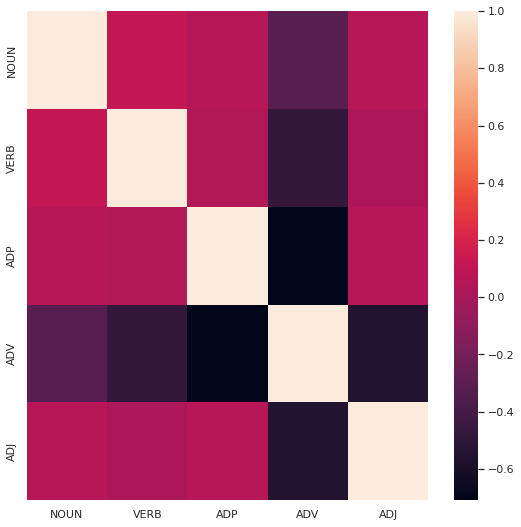

In [59]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(data=lista_mapas[0].corr().round(2))

<AxesSubplot:>

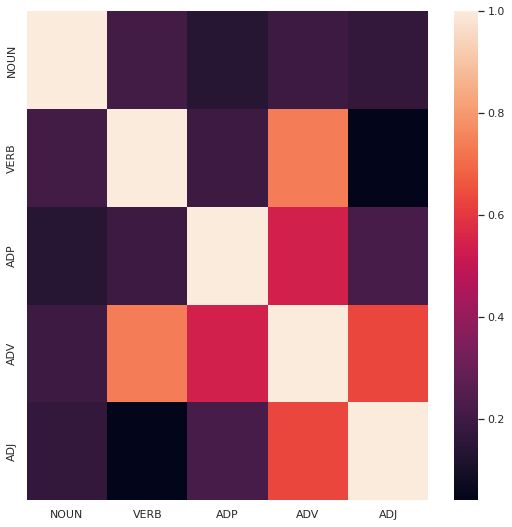

In [60]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.heatmap(data=lista_mapas[2].corr().round(2))

In [61]:
import stat

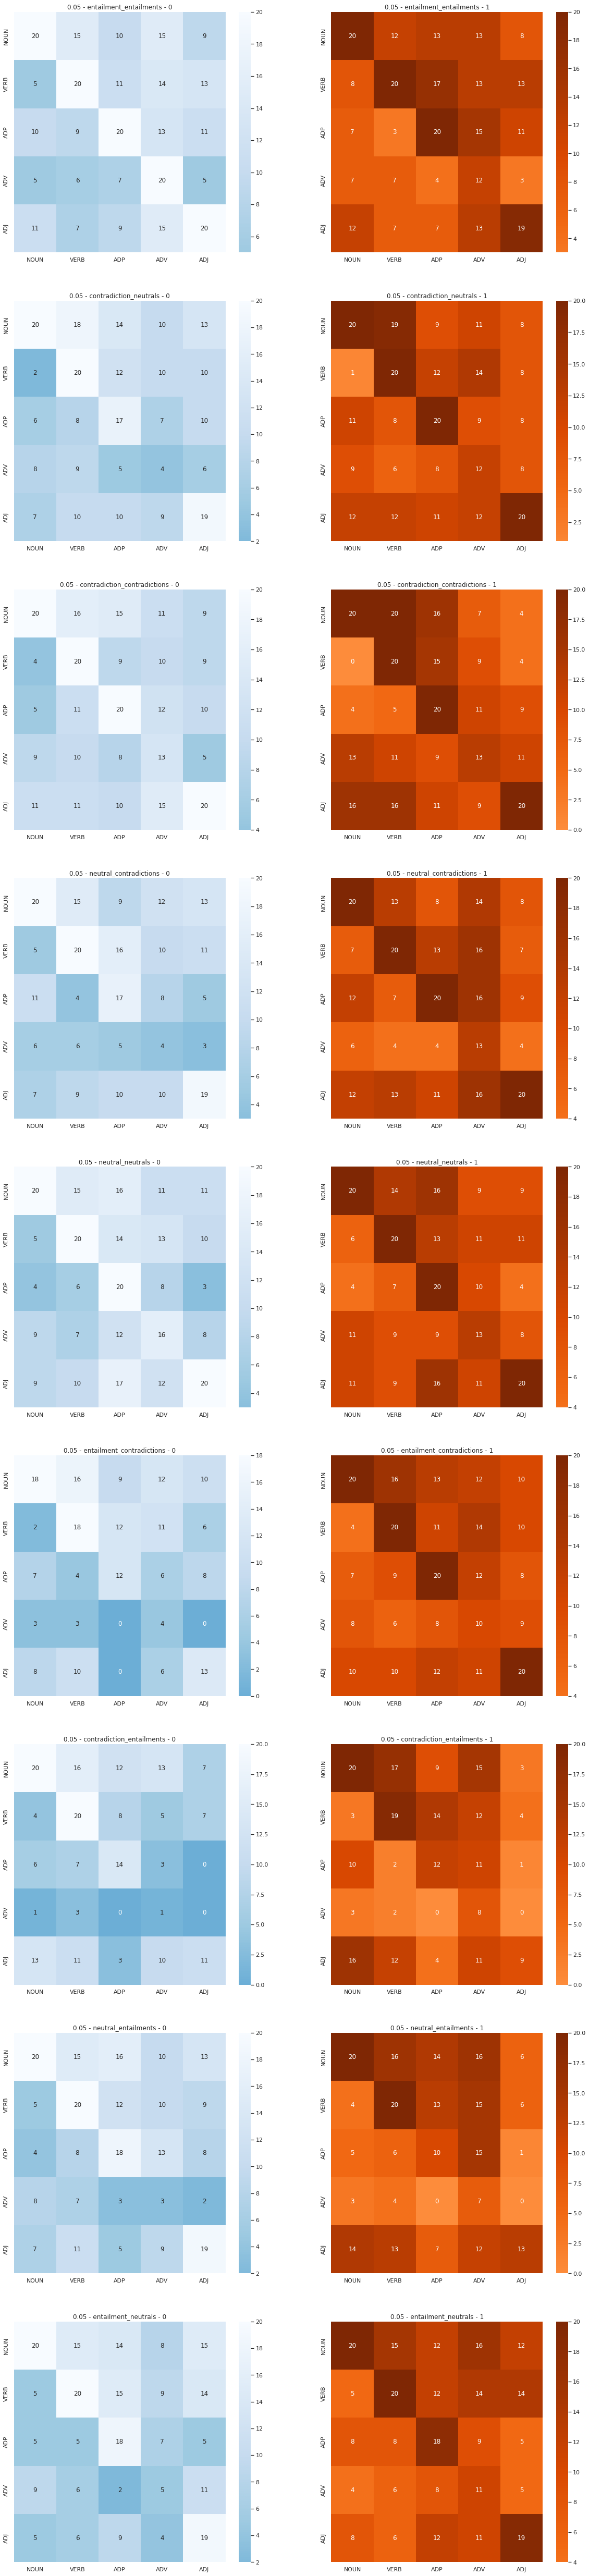

In [62]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(0,len(lista_mapas[:18]),2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

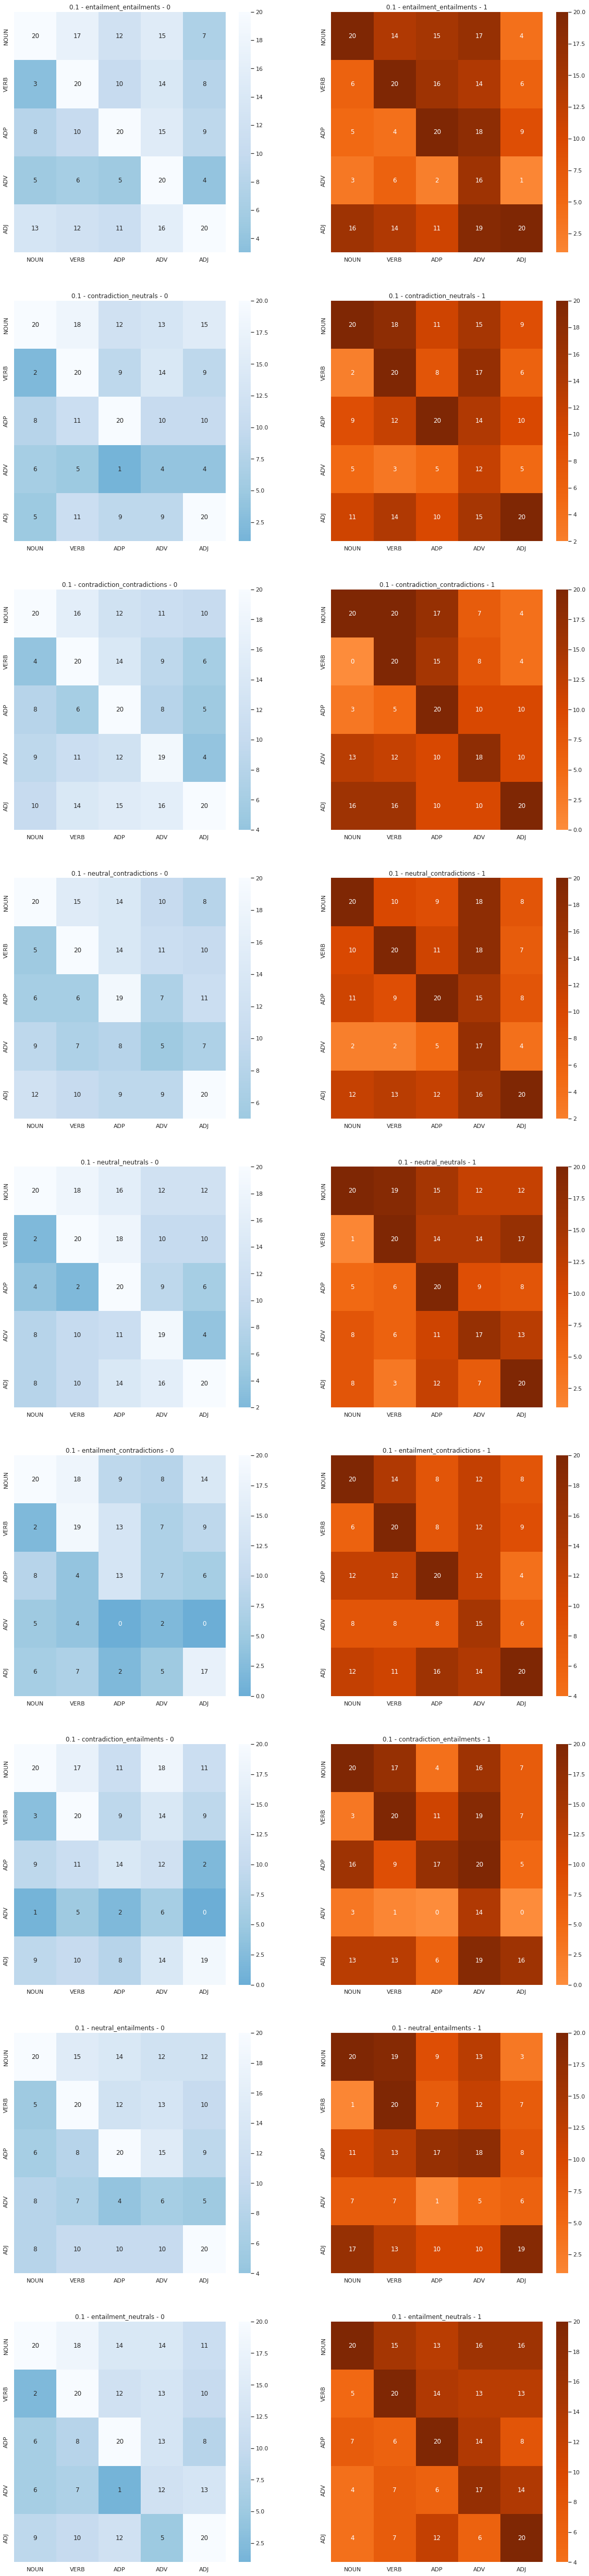

In [63]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(18,36,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

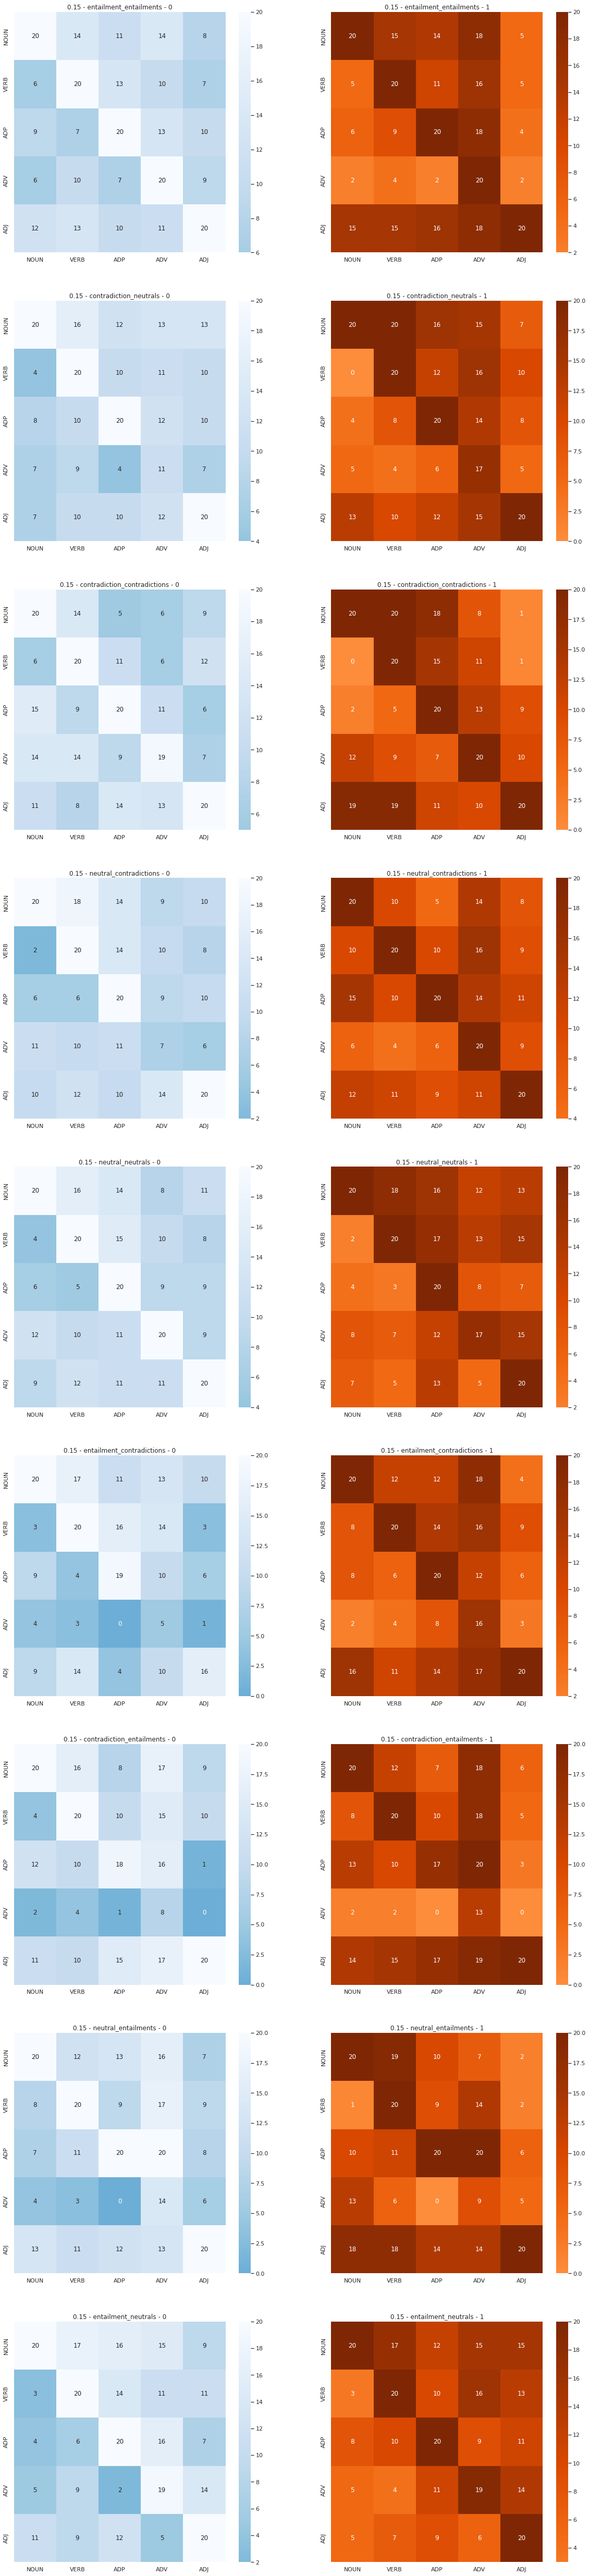

In [64]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(36,54,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

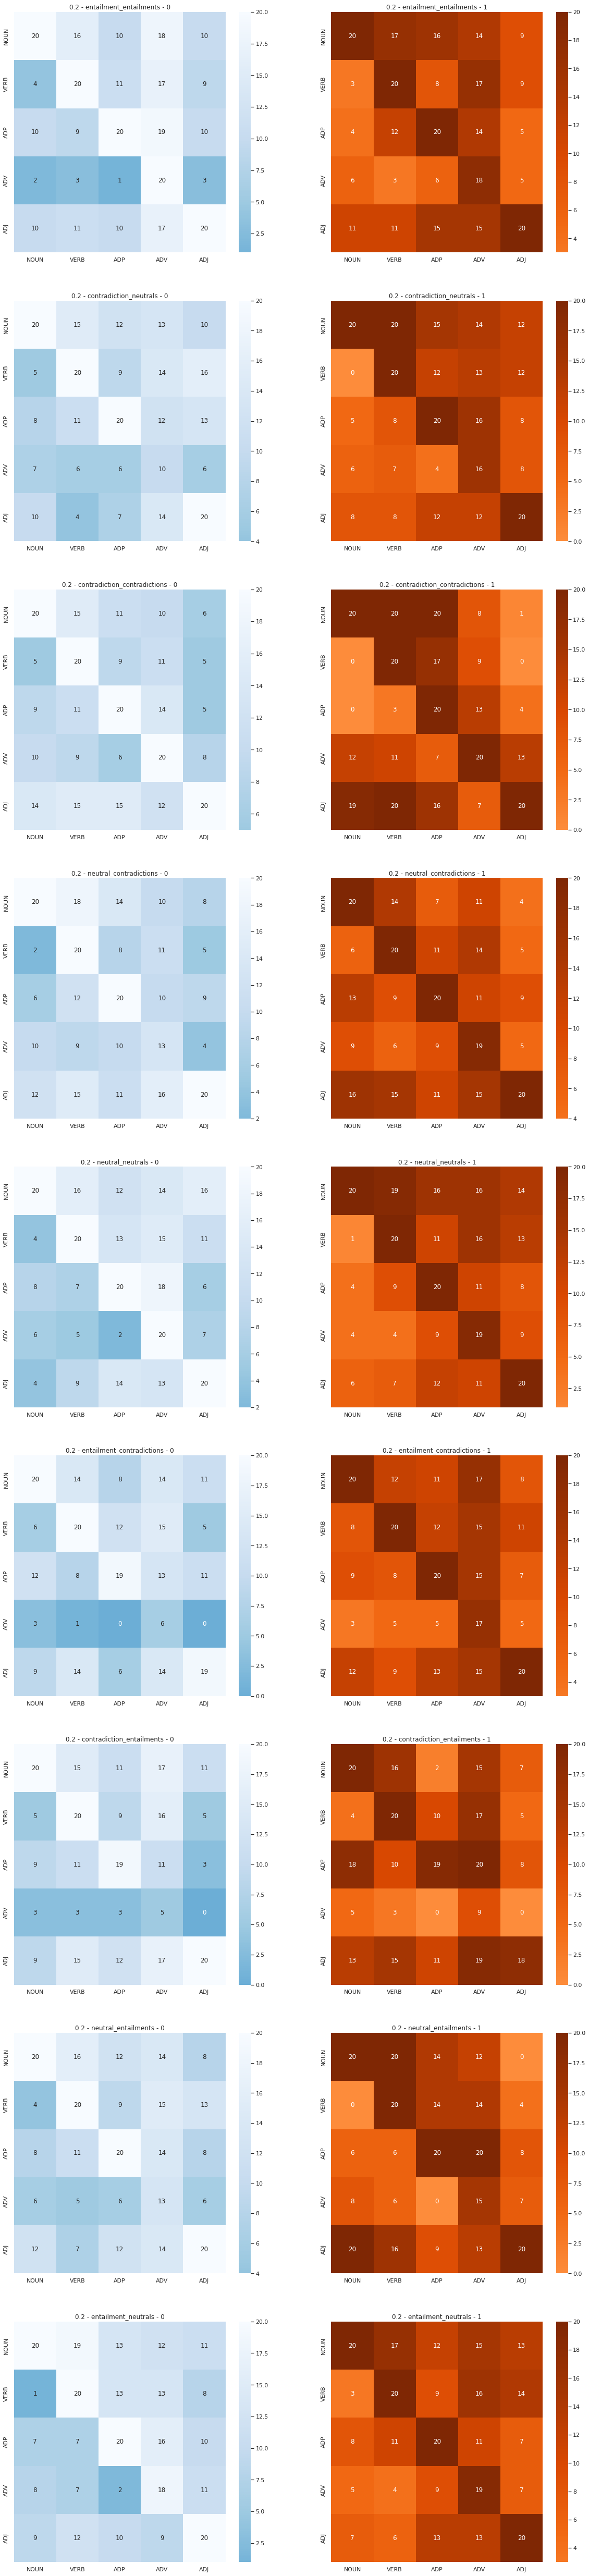

In [65]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(54,72,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

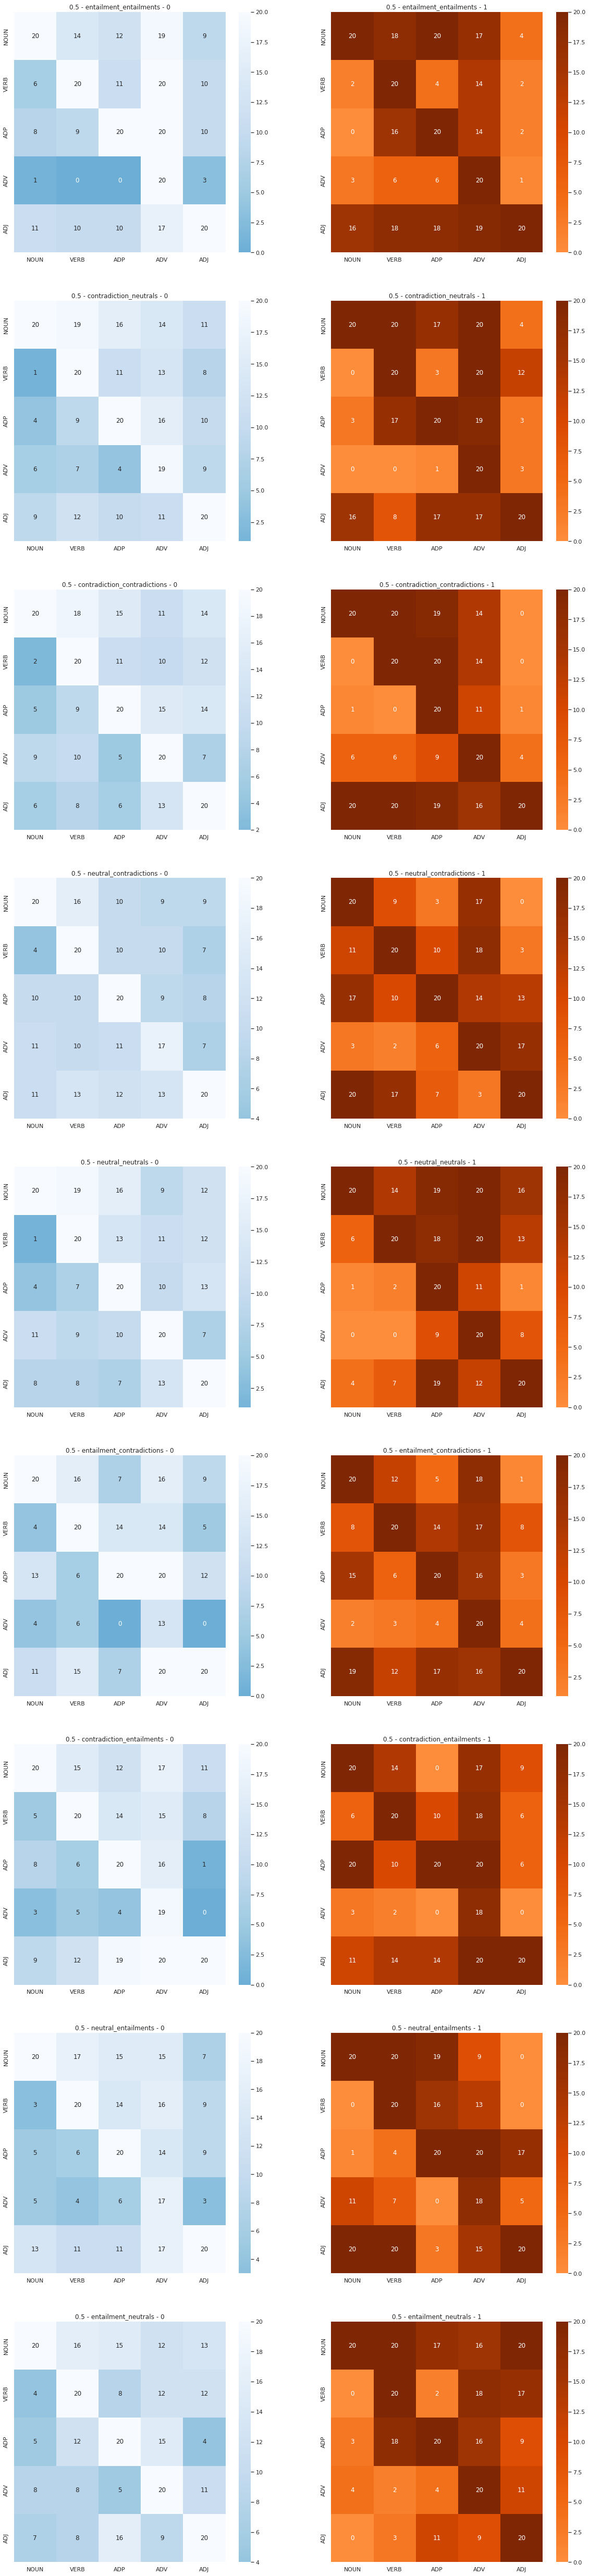

In [66]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(72,90,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

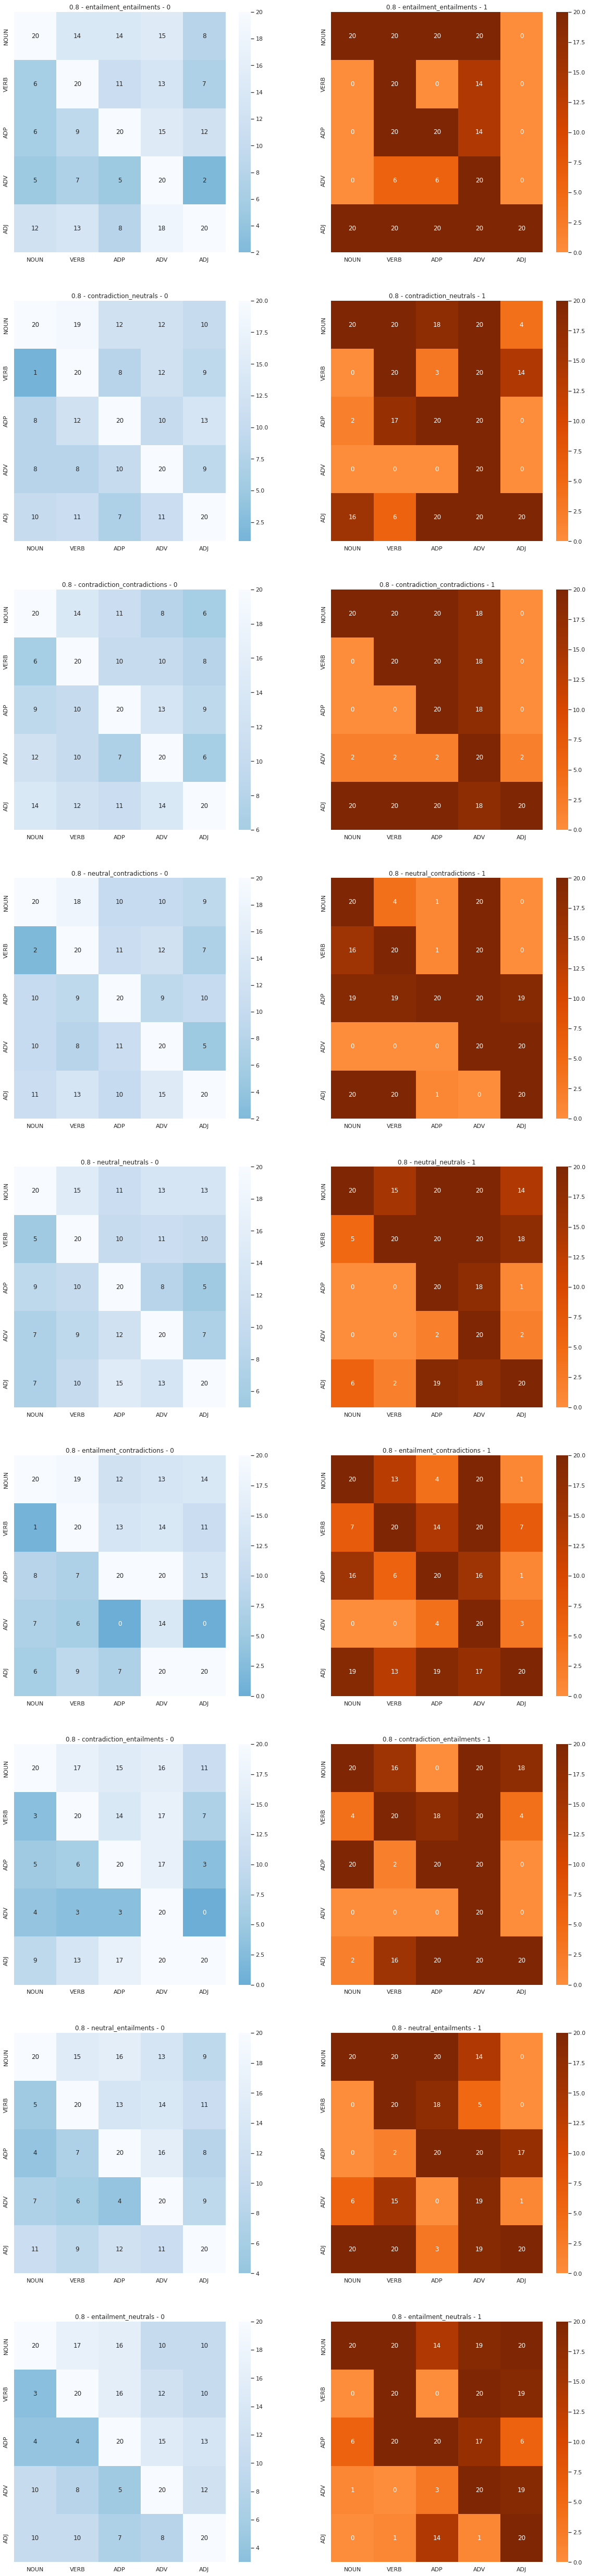

In [67]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(90,108,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

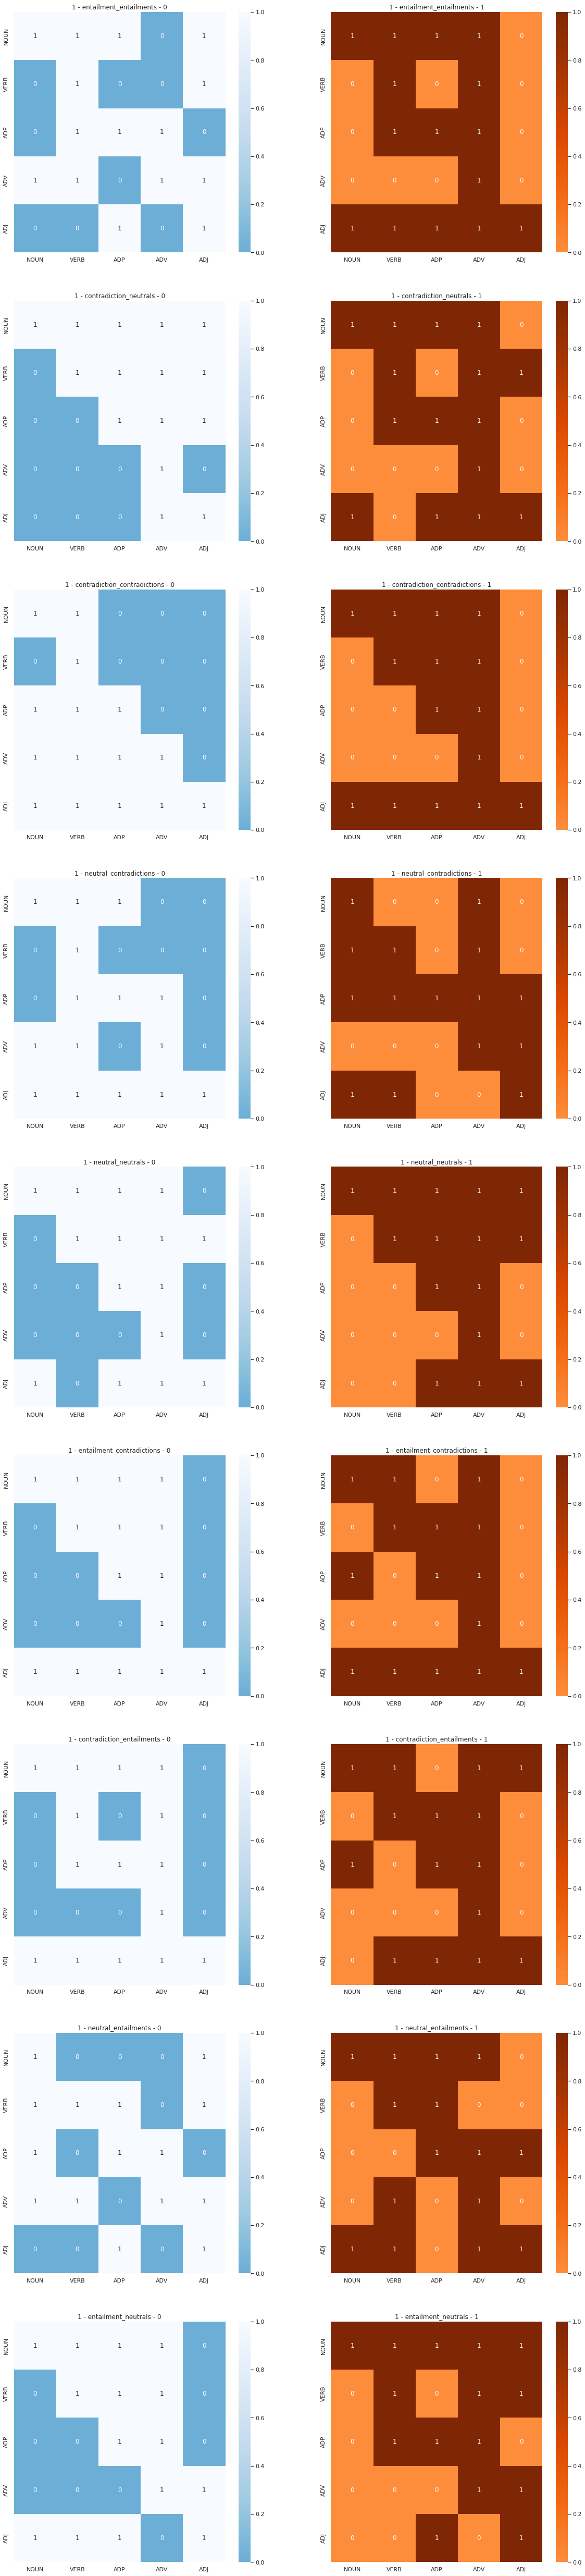

In [68]:
sns.set(rc={'figure.figsize':(20,90)})
fig,  axes= plt.subplots(9, 2)
j=0
for i in range(108,126,2):
    sns.heatmap(ax=axes[j,0],data=lista_mapas[i], center=0, cmap='Blues_r', annot=True)
    axes[j,0].set(title=lista_nombres[i])
    sns.heatmap(ax=axes[j,1],data=lista_mapas[i+1], center=0, cmap='Oranges', annot=True)
    axes[j,1].set(title=lista_nombres[i+1])
    j=j+1
plt.show()

In [69]:
lista_mapas[108]

,NOUN,VERB,ADP,ADV,ADJ
NOUN,1,1,1,0,1
VERB,0,1,0,0,1
ADP,0,1,1,1,0
ADV,1,1,0,1,1
ADJ,0,0,1,0,1
